<a href="https://colab.research.google.com/github/Whiteomi/Evidencia_2-/blob/main/consumer_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling
%pip install pandas

In [2]:
#importamos papalerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
files.upload()

In [5]:
#leemos el archivo
data1 = pd.read_excel("consumer_mit_lift_lab.xlsx")
data1

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,...,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee,240_gender_interviewee,indicate_the_type_of_store,name_of_the_store,storefront_picture_just_once_if_possible
0,94c9c1c8-f806-4dd6-9124-0447101139ce,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1980873644 19.0486653032),19.048665,-98.198087,Efectivo,yes,NaN,...,5,4,2,250,100,18,Male,Grocery store (aka. nanostore),MINI SUPER 3 NORTE,1 Photo
1,1766c0a9-8f4d-452e-b2f9-5c7f7fa6e509,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.198058866 19.0487039671),19.048704,-98.198059,Efectivo,yes,NaN,...,5,3,0,300,100,17,Male,Grocery store (aka. nanostore),MINI SUPER 3 NORTE,1 Photo
2,3f1e53cb-d761-48aa-be19-18d69ecbebf2,"November 27, 2022",2022-11-27 19:00:55 UTC,Sandra Carreón,SRID=4326;POINT(-98.2017408684 19.0459141241),19.045914,-98.201741,Efectivo,yes,NaN,...,9,12,2,500,300,30,Male,Grocery store (aka. nanostore),Abarrotes licores y vinos La ranita,1 Photo
3,335e6647-537c-47da-9efa-805a110f6936,"November 27, 2022",2022-11-27 18:51:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1981215626 19.04858956),19.048590,-98.198122,Efectivo,yes,NaN,...,2,0,1,280,150,24,Male,Grocery store (aka. nanostore),Miscelánea,1 Photo
4,902e4d41-8299-424d-834b-d1090b1743c0,"November 27, 2022",2022-11-27 16:03:02 UTC,Sandra Carreón,SRID=4326;POINT(-98.1988253072 19.0441482241),19.044148,-98.198825,Efectivo,yes,NaN,...,2,5,1,250,150,22,Female,Grocery store (aka. nanostore),Ranita “V”,1 Photo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),19.035224,-98.267100,Efectivo,yes,NaN,...,15,10,0,100,100,15,Male,Micro-restaurant (aka. fondita),Taquería don Jorge,1 Photo
371,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),19.035280,-98.267856,Efectivo,yes,NaN,...,1,1,0,50,70,21,Female,Cafeteria,La parrilla del lobo,1 Photo
372,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),19.035451,-98.267862,Efectivo,yes,NaN,...,3,2,0,0,0,18,Male,Cafeteria,La Parrilla del lobo,1 Photo
373,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),19.035486,-98.267831,Efectivo,yes,NaN,...,2,4,0,30,100,18,Male,Cafeteria,Crudopolis,1 Photo


In [6]:
#vemos su informacion
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   _record_id                                375 non-null    object 
 1   _title                                    375 non-null    object 
 2   _server_updated_at                        375 non-null    object 
 3   _updated_by                               375 non-null    object 
 4   _geometry                                 375 non-null    object 
 5   _latitude                                 375 non-null    float64
 6   _longitude                                375 non-null    float64
 7   282_payment_method_that_purchase          375 non-null    object 
 8   283_fulfill_needs                         375 non-null    object 
 9   300_did_not_find                          23 non-null     object 
 10  237_distance_household_interviewee    

In [7]:
#Verificamos los valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

_record_id                                    0
_title                                        0
_server_updated_at                            0
_updated_by                                   0
_geometry                                     0
_latitude                                     0
_longitude                                    0
282_payment_method_that_purchase              0
283_fulfill_needs                             0
300_did_not_find                            352
237_distance_household_interviewee            0
299_means_transportation_consumer             0
238_frequency_buying_store                    0
284_additional_products_store               363
301_electricity_bill                          0
305_electricity_bill_store                   29
302_water_bill                                0
306_water_bill_store                         14
303_gas_bill                                  0
307_gas_bill_store                            7
286_topups                              

In [8]:
#reemplazamos los valores nulos con la palabra nulo
data=data1.copy()
data["300_did_not_find"] =data["300_did_not_find"].fillna("nulo")
data["284_additional_products_store"] =data["284_additional_products_store"].fillna("nulo")
data["305_electricity_bill_store"] =data["305_electricity_bill_store"].fillna("nulo")
data["306_water_bill_store"] =data["306_water_bill_store"].fillna("nulo")
data["308_topups_in_store"] =data["308_topups_in_store"].fillna("nulo")
data["304_additional_services_store"] =data["304_additional_services_store"].fillna("nulo")
data["storefront_picture_just_once_if_possible"] =data["storefront_picture_just_once_if_possible"].fillna("nulo")
data["309_wiretransfers_in_store"] =data["309_wiretransfers_in_store"].fillna("nulo")

In [9]:
#verificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                  0
_title                                      0
_server_updated_at                          0
_updated_by                                 0
_geometry                                   0
_latitude                                   0
_longitude                                  0
282_payment_method_that_purchase            0
283_fulfill_needs                           0
300_did_not_find                            0
237_distance_household_interviewee          0
299_means_transportation_consumer           0
238_frequency_buying_store                  0
284_additional_products_store               0
301_electricity_bill                        0
305_electricity_bill_store                  0
302_water_bill                              0
306_water_bill_store                        0
303_gas_bill                                0
307_gas_bill_store                          7
286_topups                                  0
308_topups_in_store               

In [10]:
#aplicamos filtro
filtro1=data.iloc[ : , [0,1,2,3,4,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,32,33,34,35]] #obj
filtro2=data.iloc[ : , [12,26,27,28,29,30,31]]    #int
filtro3=data.iloc[ : , [5,6]]     #float

<Figure size 1080x576 with 0 Axes>

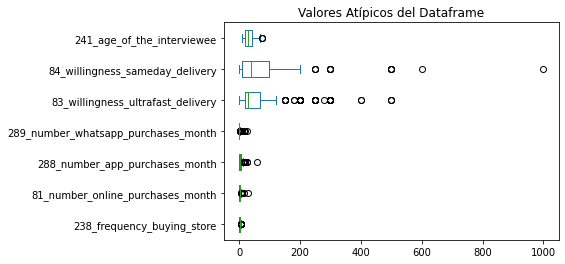

In [11]:
#hacemos una grafica de valores atipicos
fig = plt.figure(figsize =(15, 8))
filtro2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [12]:
#hacemos uso del metodo de cuartiles 
y=filtro2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 238_frequency_buying_store               6.0
81_number_online_purchases_month         7.5
288_number_app_purchases_month          12.5
289_number_whatsapp_purchases_month      2.5
83_willingness_ultrafast_delivery      145.0
84_willingness_sameday_delivery        235.0
241_age_of_the_interviewee              73.5
dtype: float64
Limite inferior permitido 238_frequency_buying_store              -2.0
81_number_online_purchases_month        -4.5
288_number_app_purchases_month          -7.5
289_number_whatsapp_purchases_month     -1.5
83_willingness_ultrafast_delivery      -55.0
84_willingness_sameday_delivery       -125.0
241_age_of_the_interviewee             -10.5
dtype: float64


In [13]:
#mostramos los limites 
outliers_iqr= filtro2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
outliers_iqr

,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,1.0,5.0,4.0,2.0,NaN,100.0,18.0
1,2.0,5.0,3.0,0.0,NaN,100.0,17.0
2,2.0,NaN,12.0,2.0,NaN,NaN,30.0
3,3.0,2.0,0.0,1.0,NaN,150.0,24.0
4,2.0,2.0,5.0,1.0,NaN,150.0,22.0
...,...,...,...,...,...,...,...
370,1.0,NaN,10.0,0.0,100.0,100.0,15.0
371,1.0,1.0,1.0,0.0,50.0,70.0,21.0
372,1.0,3.0,2.0,0.0,0.0,0.0,18.0
373,1.0,2.0,4.0,0.0,30.0,100.0,18.0


In [14]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe 
Valores_finales= outliers_iqr.copy()
Valores_finales=Valores_finales.fillna(round(outliers_iqr.mean(),1))
Valores_finales

,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,1.0,5.0,4.0,2.0,35.9,100.0,18.0
1,2.0,5.0,3.0,0.0,35.9,100.0,17.0
2,2.0,1.9,12.0,2.0,35.9,51.6,30.0
3,3.0,2.0,0.0,1.0,35.9,150.0,24.0
4,2.0,2.0,5.0,1.0,35.9,150.0,22.0
...,...,...,...,...,...,...,...
370,1.0,1.9,10.0,0.0,100.0,100.0,15.0
371,1.0,1.0,1.0,0.0,50.0,70.0,21.0
372,1.0,3.0,2.0,0.0,0.0,0.0,18.0
373,1.0,2.0,4.0,0.0,30.0,100.0,18.0


In [15]:
#vemos los valores nulos
valores_nulos=Valores_finales.isnull().sum()
valores_nulos

238_frequency_buying_store             0
81_number_online_purchases_month       0
288_number_app_purchases_month         0
289_number_whatsapp_purchases_month    0
83_willingness_ultrafast_delivery      0
84_willingness_sameday_delivery        0
241_age_of_the_interviewee             0
dtype: int64

In [16]:
#concatemos 
Lastmile_customer_limpios = pd.concat([filtro1, filtro2, filtro3], axis=1)
Lastmile_customer_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,299_means_transportation_consumer,...,storefront_picture_just_once_if_possible,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee,_latitude,_longitude
0,94c9c1c8-f806-4dd6-9124-0447101139ce,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1980873644 19.0486653032),Efectivo,yes,nulo,4 a 6 cuadras,A pie,...,1 Photo,1,5,4,2,250,100,18,19.048665,-98.198087
1,1766c0a9-8f4d-452e-b2f9-5c7f7fa6e509,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.198058866 19.0487039671),Efectivo,yes,nulo,7 a 10 cuadras,A pie,...,1 Photo,2,5,3,0,300,100,17,19.048704,-98.198059
2,3f1e53cb-d761-48aa-be19-18d69ecbebf2,"November 27, 2022",2022-11-27 19:00:55 UTC,Sandra Carreón,SRID=4326;POINT(-98.2017408684 19.0459141241),Efectivo,yes,nulo,7 a 10 cuadras,Bicicleta,...,1 Photo,2,9,12,2,500,300,30,19.045914,-98.201741
3,335e6647-537c-47da-9efa-805a110f6936,"November 27, 2022",2022-11-27 18:51:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1981215626 19.04858956),Efectivo,yes,nulo,7 a 10 cuadras,A pie,...,1 Photo,3,2,0,1,280,150,24,19.048590,-98.198122
4,902e4d41-8299-424d-834b-d1090b1743c0,"November 27, 2022",2022-11-27 16:03:02 UTC,Sandra Carreón,SRID=4326;POINT(-98.1988253072 19.0441482241),Efectivo,yes,nulo,7 a 10 cuadras,A pie,...,1 Photo,2,2,5,1,250,150,22,19.044148,-98.198825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,nulo,20 min,Automóvil,...,1 Photo,1,15,10,0,100,100,15,19.035224,-98.267100
371,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,nulo,30 min,Transporte público,...,1 Photo,1,1,1,0,50,70,21,19.035280,-98.267856
372,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,nulo,0 a 3 cuadras,A pie,...,1 Photo,1,3,2,0,0,0,18,19.035451,-98.267862
373,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,nulo,más de 10 cuadras,Didi,...,1 Photo,1,2,4,0,30,100,18,19.035486,-98.267831


In [17]:
Lastmile_customer_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   _record_id                                375 non-null    object 
 1   _title                                    375 non-null    object 
 2   _server_updated_at                        375 non-null    object 
 3   _updated_by                               375 non-null    object 
 4   _geometry                                 375 non-null    object 
 5   282_payment_method_that_purchase          375 non-null    object 
 6   283_fulfill_needs                         375 non-null    object 
 7   300_did_not_find                          375 non-null    object 
 8   237_distance_household_interviewee        375 non-null    object 
 9   299_means_transportation_consumer         375 non-null    object 
 10  284_additional_products_store         

In [18]:
#Convertir DataFrame a CSV
Lastmile_customer_limpios.to_csv("2_ consumer_mit_lift_lab.csv")

In [19]:
#Descargar archivo filtrado en csv 
from google.colab import files
files.download("2_ consumer_mit_lift_lab.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Evidencia** 3: Regresiones 


In [20]:
Lastmile_customer_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,299_means_transportation_consumer,...,storefront_picture_just_once_if_possible,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee,_latitude,_longitude
0,94c9c1c8-f806-4dd6-9124-0447101139ce,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1980873644 19.0486653032),Efectivo,yes,nulo,4 a 6 cuadras,A pie,...,1 Photo,1,5,4,2,250,100,18,19.048665,-98.198087
1,1766c0a9-8f4d-452e-b2f9-5c7f7fa6e509,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.198058866 19.0487039671),Efectivo,yes,nulo,7 a 10 cuadras,A pie,...,1 Photo,2,5,3,0,300,100,17,19.048704,-98.198059
2,3f1e53cb-d761-48aa-be19-18d69ecbebf2,"November 27, 2022",2022-11-27 19:00:55 UTC,Sandra Carreón,SRID=4326;POINT(-98.2017408684 19.0459141241),Efectivo,yes,nulo,7 a 10 cuadras,Bicicleta,...,1 Photo,2,9,12,2,500,300,30,19.045914,-98.201741
3,335e6647-537c-47da-9efa-805a110f6936,"November 27, 2022",2022-11-27 18:51:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1981215626 19.04858956),Efectivo,yes,nulo,7 a 10 cuadras,A pie,...,1 Photo,3,2,0,1,280,150,24,19.048590,-98.198122
4,902e4d41-8299-424d-834b-d1090b1743c0,"November 27, 2022",2022-11-27 16:03:02 UTC,Sandra Carreón,SRID=4326;POINT(-98.1988253072 19.0441482241),Efectivo,yes,nulo,7 a 10 cuadras,A pie,...,1 Photo,2,2,5,1,250,150,22,19.044148,-98.198825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,nulo,20 min,Automóvil,...,1 Photo,1,15,10,0,100,100,15,19.035224,-98.267100
371,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,nulo,30 min,Transporte público,...,1 Photo,1,1,1,0,50,70,21,19.035280,-98.267856
372,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,nulo,0 a 3 cuadras,A pie,...,1 Photo,1,3,2,0,0,0,18,19.035451,-98.267862
373,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,nulo,más de 10 cuadras,Didi,...,1 Photo,1,2,4,0,30,100,18,19.035486,-98.267831


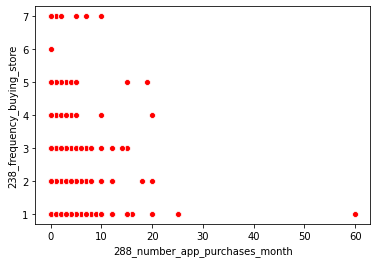

In [21]:
sns.scatterplot(x='288_number_app_purchases_month', y='238_frequency_buying_store', color="red", data=Lastmile_customer_limpios)

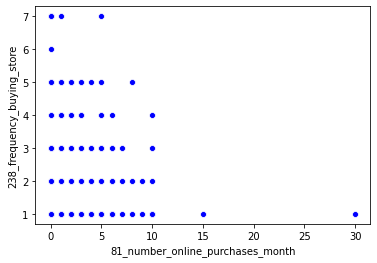

In [22]:
sns.scatterplot(x='81_number_online_purchases_month', y='238_frequency_buying_store', color="blue", data=Lastmile_customer_limpios)

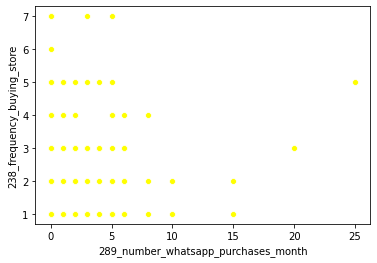

In [23]:
sns.scatterplot(x='289_number_whatsapp_purchases_month', y='238_frequency_buying_store', color="yellow", data=Lastmile_customer_limpios)

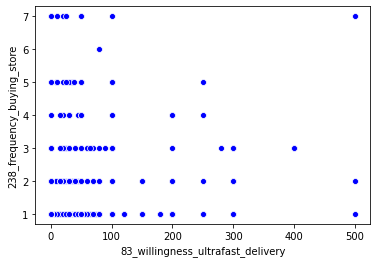

In [24]:
sns.scatterplot(x='83_willingness_ultrafast_delivery', y='238_frequency_buying_store', color="blue", data=Lastmile_customer_limpios)

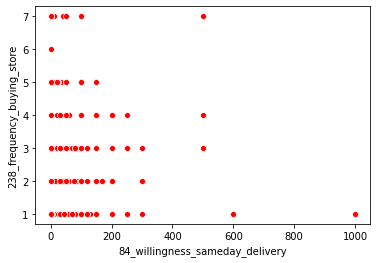

In [25]:
sns.scatterplot(x='84_willingness_sameday_delivery', y='238_frequency_buying_store', color="red", data=Lastmile_customer_limpios)

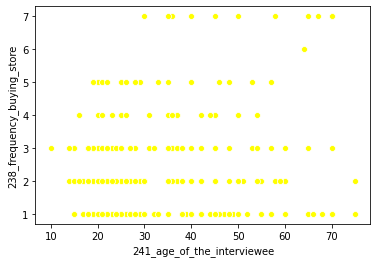

In [26]:
sns.scatterplot(x='241_age_of_the_interviewee', y='238_frequency_buying_store', color="yellow", data=Lastmile_customer_limpios)

In [27]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepm1= Lastmile_customer_limpios[['288_number_app_purchases_month', '81_number_online_purchases_month','289_number_whatsapp_purchases_month']]
Var_Depm1= Lastmile_customer_limpios['238_frequency_buying_store']

In [28]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indepm2= Lastmile_customer_limpios[['83_willingness_ultrafast_delivery', '84_willingness_sameday_delivery','241_age_of_the_interviewee']]
Var_Depm2= Lastmile_customer_limpios['238_frequency_buying_store']

In [29]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [30]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [31]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indepm1, y=Var_Depm1)

LinearRegression()

In [32]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['288_number_app_purchases_month',
        '81_number_online_purchases_month',
        '289_number_whatsapp_purchases_month'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00264977, -0.06681739,  0.0654633 ]),
 '_residues': 750.6379896132061,
 'rank_': 3,
 'singular_': array([106.97117969,  48.54340704,  36.7067707 ]),
 'intercept_': 2.137779928127828}

In [33]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indepm1,Var_Depm1)

0.02539523687452494

In [34]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Lastmile_customer_limpios[['288_number_app_purchases_month', '81_number_online_purchases_month','289_number_whatsapp_purchases_month']])
y_pred

array([1.94521871, 1.81164232, 1.69914736, 2.06960846, 2.08285733,
       1.93732777, 2.01209448, 2.29114204, 2.00279108, 2.13777993,
       2.13777993, 1.94127324, 1.93732777, 1.93997755, 1.74482494,
       2.07755779, 2.00414516, 1.94256893, 2.00679493, 1.87580993,
       3.78231186, 2.13777993, 1.7363026 , 3.15270571, 2.99669382,
       2.01209448, 2.79241297, 1.86993737, 2.53055975, 2.15626996,
       2.01739403, 1.77662223, 2.07891187, 2.08945258, 2.01209448,
       2.1404297 , 2.13777993, 2.13777993, 1.93997755, 2.01209448,
       2.14302109, 2.07626209, 2.13777993, 2.00679493, 1.50935269,
       2.0868028 , 1.82754097, 2.08150325, 1.94786848, 2.00944471,
       2.13777993, 2.13777993, 2.07096254, 2.07096254, 2.00679493,
       2.00414516, 1.9452771 , 2.00414516, 2.13777993, 2.13777993,
       2.00944471, 1.93732777, 2.13777993, 2.08285733, 2.01733564,
       2.08421142, 2.1404297 , 2.14572925, 2.07891187, 2.20324323,
       2.13777993, 2.13777993, 2.13777993, 2.07096254, 2.13777

In [35]:
#Insertamos la columna de predicciones en el DataFrame
Lastmile_customer_limpios.insert(0, 'Predicciones', y_pred)
Lastmile_customer_limpios

,Predicciones,_record_id,_title,_server_updated_at,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,...,storefront_picture_just_once_if_possible,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee,_latitude,_longitude
0,1.945219,94c9c1c8-f806-4dd6-9124-0447101139ce,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1980873644 19.0486653032),Efectivo,yes,nulo,4 a 6 cuadras,...,1 Photo,1,5,4,2,250,100,18,19.048665,-98.198087
1,1.811642,1766c0a9-8f4d-452e-b2f9-5c7f7fa6e509,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.198058866 19.0487039671),Efectivo,yes,nulo,7 a 10 cuadras,...,1 Photo,2,5,3,0,300,100,17,19.048704,-98.198059
2,1.699147,3f1e53cb-d761-48aa-be19-18d69ecbebf2,"November 27, 2022",2022-11-27 19:00:55 UTC,Sandra Carreón,SRID=4326;POINT(-98.2017408684 19.0459141241),Efectivo,yes,nulo,7 a 10 cuadras,...,1 Photo,2,9,12,2,500,300,30,19.045914,-98.201741
3,2.069608,335e6647-537c-47da-9efa-805a110f6936,"November 27, 2022",2022-11-27 18:51:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1981215626 19.04858956),Efectivo,yes,nulo,7 a 10 cuadras,...,1 Photo,3,2,0,1,280,150,24,19.048590,-98.198122
4,2.082857,902e4d41-8299-424d-834b-d1090b1743c0,"November 27, 2022",2022-11-27 16:03:02 UTC,Sandra Carreón,SRID=4326;POINT(-98.1988253072 19.0441482241),Efectivo,yes,nulo,7 a 10 cuadras,...,1 Photo,2,2,5,1,250,150,22,19.044148,-98.198825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1.162017,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,nulo,20 min,...,1 Photo,1,15,10,0,100,100,15,19.035224,-98.267100
371,2.073612,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,nulo,30 min,...,1 Photo,1,1,1,0,50,70,21,19.035280,-98.267856
372,1.942627,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,nulo,0 a 3 cuadras,...,1 Photo,1,3,2,0,0,0,18,19.035451,-98.267862
373,2.014744,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,nulo,más de 10 cuadras,...,1 Photo,1,2,4,0,30,100,18,19.035486,-98.267831


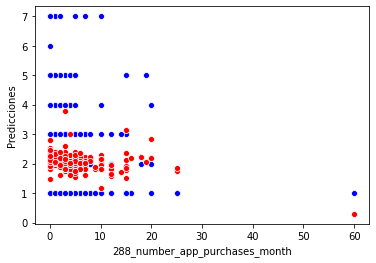

In [36]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='288_number_app_purchases_month', y='238_frequency_buying_store', color="blue", data=Lastmile_customer_limpios)
sns.scatterplot(x='288_number_app_purchases_month', y='Predicciones', color="red", data=Lastmile_customer_limpios)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [37]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indepm1, y=Var_Depm1)
coef_Deter

0.02539523687452494

In [38]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.15935883055081992

Regresion lineal 2

In [39]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [40]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [41]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indepm1, y=Var_Depm1)

LinearRegression()

In [42]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['288_number_app_purchases_month',
        '81_number_online_purchases_month',
        '289_number_whatsapp_purchases_month'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00264977, -0.06681739,  0.0654633 ]),
 '_residues': 750.6379896132061,
 'rank_': 3,
 'singular_': array([106.97117969,  48.54340704,  36.7067707 ]),
 'intercept_': 2.137779928127828}

In [43]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indepm2,Var_Depm2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 241_age_of_the_interviewee
- 83_willingness_ultrafast_delivery
- 84_willingness_sameday_delivery
Feature names seen at fit time, yet now missing:
- 288_number_app_purchases_month
- 289_number_whatsapp_purchases_month
- 81_number_online_purchases_month

  warnings.warn(message, FutureWarning)


-20.831080718764163

In [44]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred2= model.predict(X=Lastmile_customer_limpios[['83_willingness_ultrafast_delivery', '84_willingness_sameday_delivery','241_age_of_the_interviewee']])
y_pred2

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 241_age_of_the_interviewee
- 83_willingness_ultrafast_delivery
- 84_willingness_sameday_delivery
Feature names seen at fit time, yet now missing:
- 288_number_app_purchases_month
- 289_number_whatsapp_purchases_month
- 81_number_online_purchases_month

  warnings.warn(message, FutureWarning)


array([-2.70317549e+00, -2.63615006e+00, -1.46186493e+01, -5.57177170e+00,
       -5.78219155e+00, -7.11697714e+00, -5.98014359e+00, -2.96659083e+00,
       -4.45133233e-01,  2.66549410e+00,  4.29806897e+00, -1.11499777e+01,
        2.07320011e+00, -1.59186144e+00, -8.66325558e+00, -5.41324319e-01,
       -5.58111526e+00, -1.19595736e+00, -3.35590848e-01, -2.30883353e+00,
        2.07163799e+00,  4.26066554e+00, -1.44944527e+00,  1.20695791e-01,
        2.20256459e+00,  4.04966181e+00,  4.10167906e+00, -1.60588712e+01,
        6.11857368e+00, -2.88472085e+01, -8.52767179e+00,  8.27054142e-01,
        2.84482458e+00,  2.45881517e+00,  3.09372087e+00,  2.54322475e+00,
        2.57001443e+00,  5.75798900e+00,  4.19741041e+00,  3.95122229e+00,
        3.02825756e+00,  2.16369379e+00,  4.11463599e+00,  2.57050356e+00,
        2.19019154e+00,  3.58415915e+00,  1.08812630e+00,  3.55089099e+00,
        2.15692339e+00,  1.52201769e+00,  2.92890945e+00,  4.01639365e+00,
        1.98055276e+00,  

In [45]:
#Insertamos la columna de predicciones en el DataFrame
Lastmile_customer_limpios.insert(0, 'Predicciones2', y_pred2)
Lastmile_customer_limpios

,Predicciones2,Predicciones,_record_id,_title,_server_updated_at,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,...,storefront_picture_just_once_if_possible,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee,_latitude,_longitude
0,-2.703175,1.945219,94c9c1c8-f806-4dd6-9124-0447101139ce,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1980873644 19.0486653032),Efectivo,yes,nulo,...,1 Photo,1,5,4,2,250,100,18,19.048665,-98.198087
1,-2.636150,1.811642,1766c0a9-8f4d-452e-b2f9-5c7f7fa6e509,"November 27, 2022",2022-11-27 19:17:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.198058866 19.0487039671),Efectivo,yes,nulo,...,1 Photo,2,5,3,0,300,100,17,19.048704,-98.198059
2,-14.618649,1.699147,3f1e53cb-d761-48aa-be19-18d69ecbebf2,"November 27, 2022",2022-11-27 19:00:55 UTC,Sandra Carreón,SRID=4326;POINT(-98.2017408684 19.0459141241),Efectivo,yes,nulo,...,1 Photo,2,9,12,2,500,300,30,19.045914,-98.201741
3,-5.571772,2.069608,335e6647-537c-47da-9efa-805a110f6936,"November 27, 2022",2022-11-27 18:51:26 UTC,Sandra Carreón,SRID=4326;POINT(-98.1981215626 19.04858956),Efectivo,yes,nulo,...,1 Photo,3,2,0,1,280,150,24,19.048590,-98.198122
4,-5.782192,2.082857,902e4d41-8299-424d-834b-d1090b1743c0,"November 27, 2022",2022-11-27 16:03:02 UTC,Sandra Carreón,SRID=4326;POINT(-98.1988253072 19.0441482241),Efectivo,yes,nulo,...,1 Photo,2,2,5,1,250,150,22,19.044148,-98.198825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,-3.297032,1.162017,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,nulo,...,1 Photo,1,15,10,0,100,100,15,19.035224,-98.267100
371,-1.032219,2.073612,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,nulo,...,1 Photo,1,1,1,0,50,70,21,19.035280,-98.267856
372,3.316119,1.942627,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,nulo,...,1 Photo,1,3,2,0,0,0,18,19.035451,-98.267862
373,-3.286126,2.014744,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,nulo,...,1 Photo,1,2,4,0,30,100,18,19.035486,-98.267831


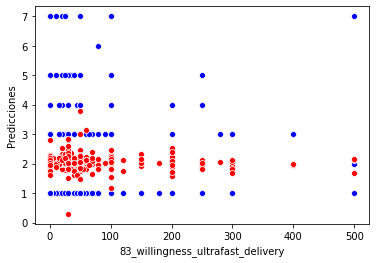

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='83_willingness_ultrafast_delivery', y='238_frequency_buying_store', color="blue", data=Lastmile_customer_limpios)
sns.scatterplot(x='83_willingness_ultrafast_delivery', y='Predicciones', color="red", data=Lastmile_customer_limpios)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [47]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indepm2, y=Var_Depm2)
coef_Deter

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 241_age_of_the_interviewee
- 83_willingness_ultrafast_delivery
- 84_willingness_sameday_delivery
Feature names seen at fit time, yet now missing:
- 288_number_app_purchases_month
- 289_number_whatsapp_purchases_month
- 81_number_online_purchases_month

  warnings.warn(message, FutureWarning)


-20.831080718764163

In [48]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

<ipython-input-48-7aa01c696c12>:2: RuntimeWarning: invalid value encountered in sqrt
  coef_Correl=np.sqrt(coef_Deter)


nan

Modelo regresion logistica 1

In [49]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indepm3= Lastmile_customer_limpios[['288_number_app_purchases_month', '81_number_online_purchases_month','289_number_whatsapp_purchases_month']]
Var_Depm3= Lastmile_customer_limpios['283_fulfill_needs']

In [50]:
#Redefinimos las variables 
X= Vars_Indepm3
y= Var_Depm3

In [51]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [52]:
#Se escalan todos los datos
escalar = StandardScaler()

In [53]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [54]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [55]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [56]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [57]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  0   9]
 [  0 104]]


In [58]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9203539823008849


In [59]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9203539823008849


In [60]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


In [61]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.9585253456221198


Regresion logistica 2

In [62]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indepm4= Lastmile_customer_limpios[['83_willingness_ultrafast_delivery', '84_willingness_sameday_delivery','241_age_of_the_interviewee']]
Var_Depm4= Lastmile_customer_limpios['283_fulfill_needs']

In [63]:
#Redefinimos las variables 
X= Vars_Indepm4
y= Var_Depm4

In [64]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [65]:
#Se escalan todos los datos
escalar = StandardScaler()

In [66]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [67]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [68]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [69]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [70]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  0  10]
 [  0 103]]


In [71]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.911504424778761


In [72]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.911504424778761


In [73]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


In [74]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.9537037037037037
